In [7]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import collections
import corner

plt.rcParams['axes.formatter.useoffset'] = False

In [8]:
dir_mods = 'target_TASTE_example/'

filename = 'target_TASTE_cornerplot'


planet_list = ['b']


In [9]:
# Kipping transformation for quadratic limb darkening coefficients
def get_2var_c1(q1, q2):
    return 2.0*np.sqrt(q1) * q2

def get_2var_c2(q1, q2):
    return np.sqrt(q1) * (1.0 - 2.0*q2)

In [10]:
# Dictionary keyword is the filename in emcee_plot/planet_samples/

planet_dictionary = {
    'b_P.dat': 'Period [d]',
    'b_Tc.dat': 'Time of transit',
    'b_b.dat': 'Impact parameter',
    'b_R_Rj.dat': 'Radius [R_j]',
}


q1_samples = np.genfromtxt('4_limb_darkening_ld_q1.dat') #dir_mods + 'emcee_plot/all_samples/' + 
q2_samples = np.genfromtxt('5_limb_darkening_ld_q2.dat')  #dir_mods + 'emcee_plot/all_samples/' + 
rho_samples = np.genfromtxt('6_star_parameters_density.dat') #dir_mods + 'emcee_plot/all_samples/' + 
logln_samples = np.genfromtxt('log_likelihood.dat') #dir_mods + 'emcee_plot/all_samples/' + 

n_box = len(planet_dictionary) + 4
n_samples = len(q1_samples)

samples = np.empty([n_samples, n_box])
labels = []
i_index = 0

for i_index, key_name in enumerate(planet_dictionary):
    samples[:, i_index] = np.genfromtxt('planet_samples/' + key_name) #dir_mods + 'emcee_plot/planet_samples/'
    labels.append(planet_dictionary[key_name])

samples[:, i_index+1] = get_2var_c1(q1_samples, q2_samples)
labels.append('LD c1')
samples[:, i_index+2] = get_2var_c2(q1_samples, q2_samples)
labels.append('LD c2')
samples[:, i_index+3] = rho_samples
labels.append('density')

samples[:, i_index+4] = logln_samples
labels.append('log-likelihood ')

print(labels)

median = np.median(samples, axis=0)


['Period [d]', 'Time of transit', 'Impact parameter', 'Radius [R_j]', 'LD c1', 'LD c2', 'density', 'log-likelihood ']


<IPython.core.display.Javascript object>


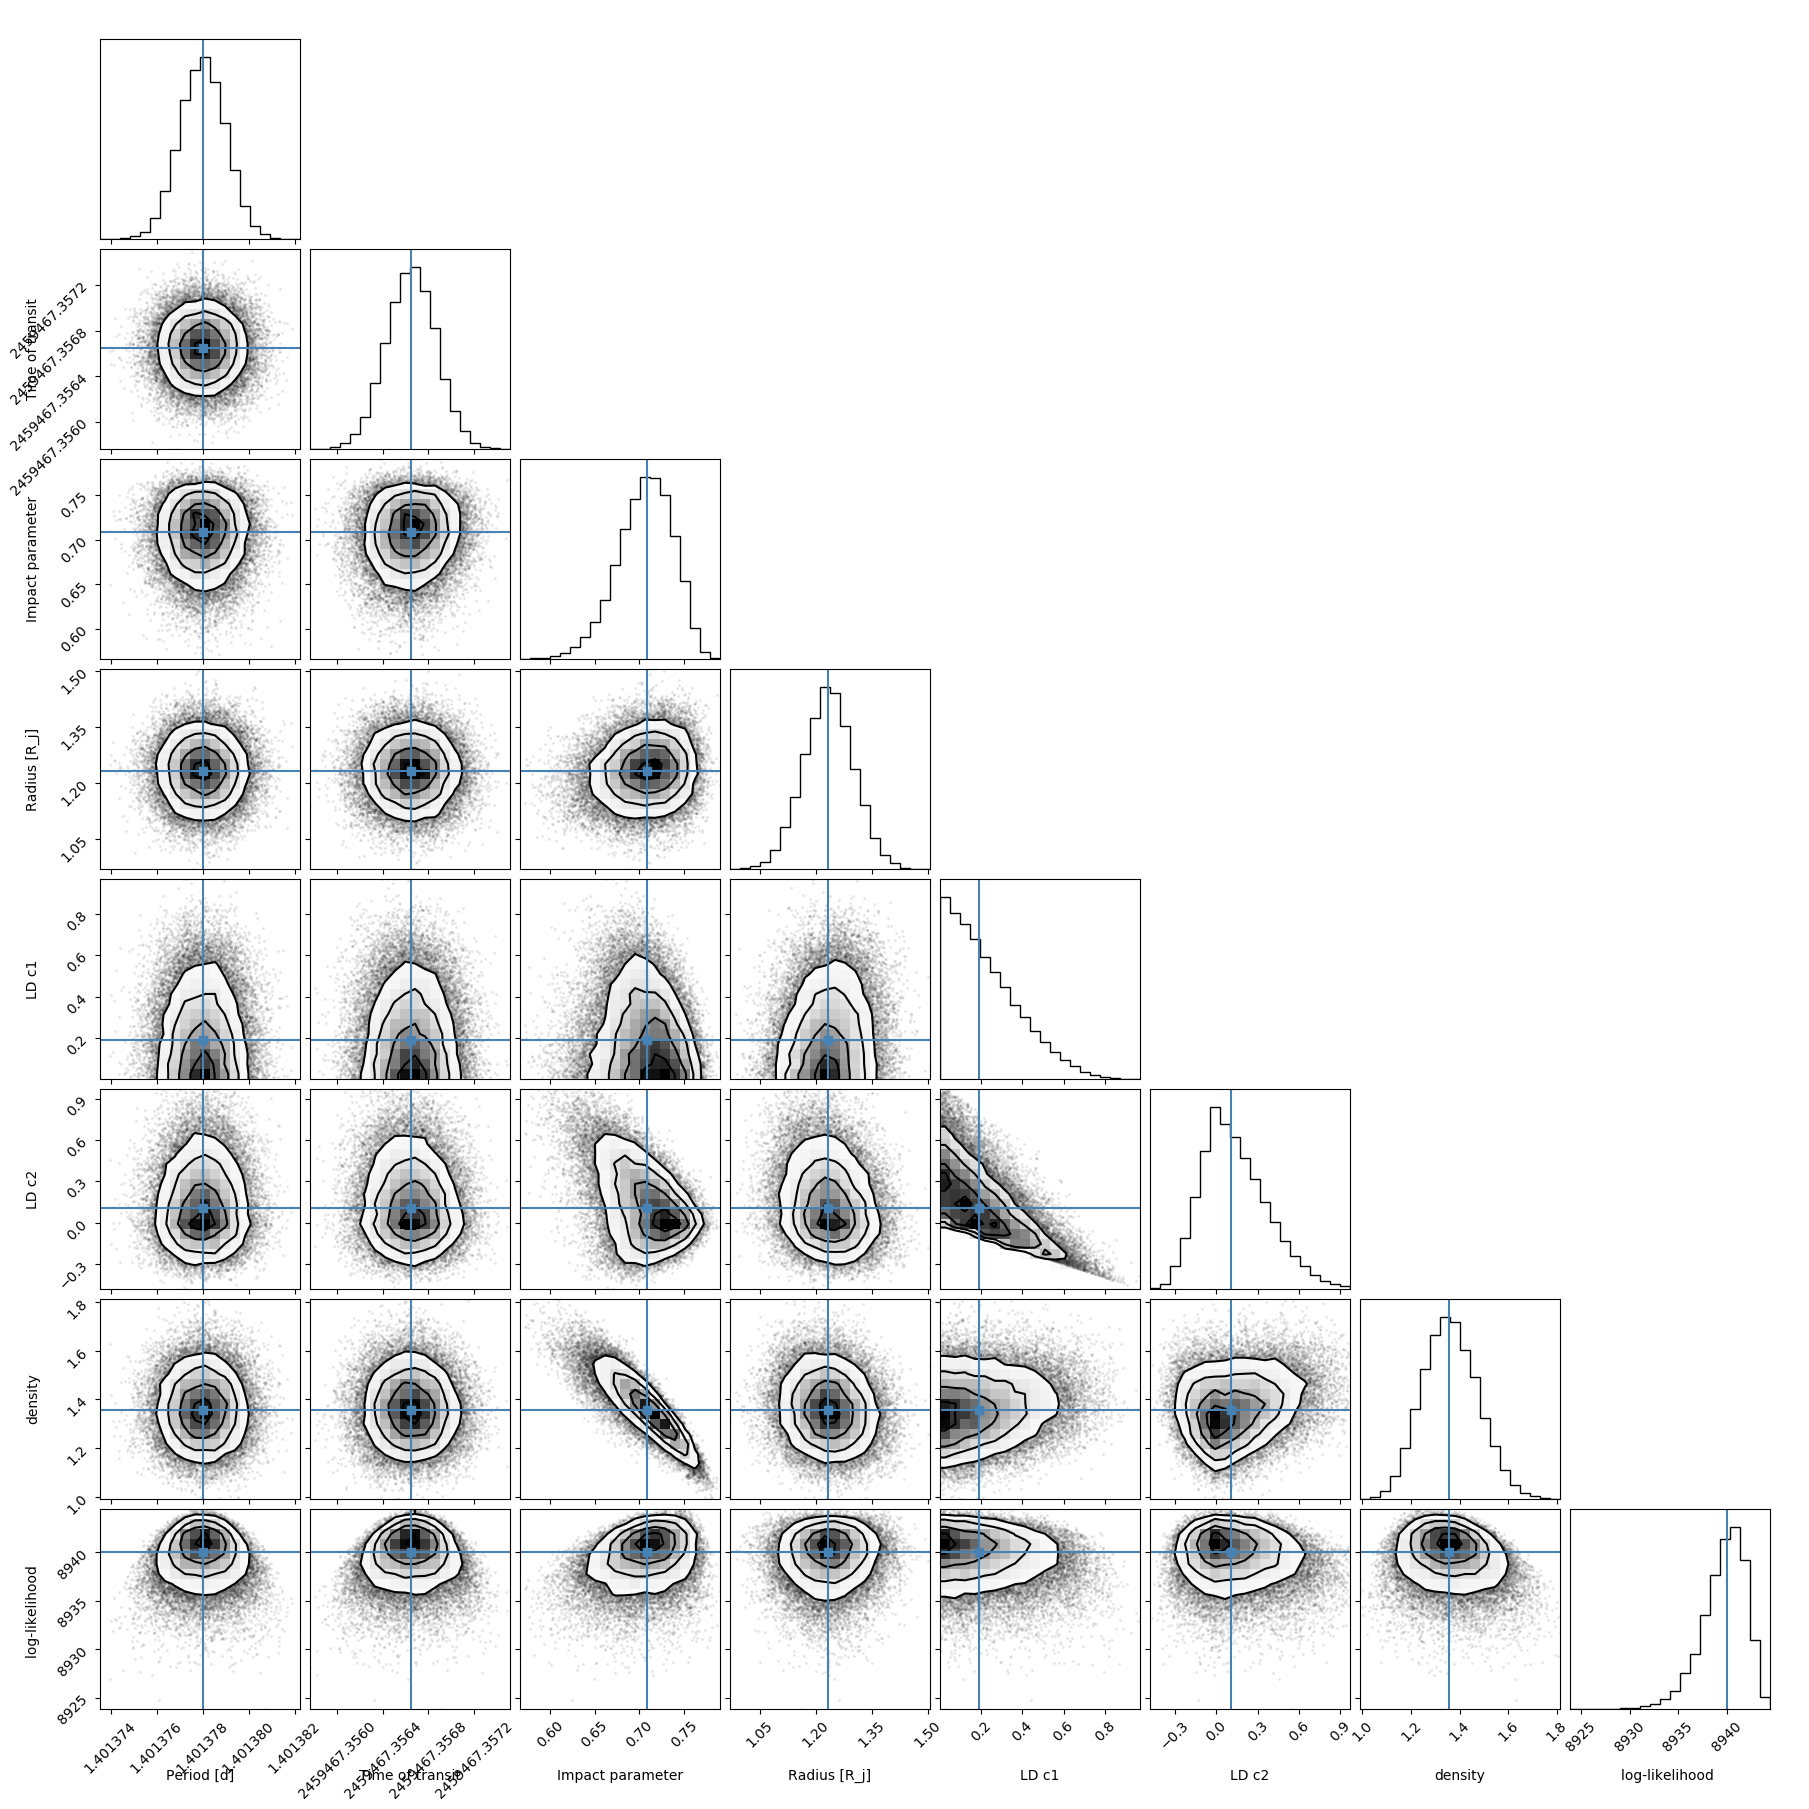

In [11]:
figure = corner.corner(samples, labels=labels, truths=median,
                       show_titles=False, title_kwargs={"fontsize": 12})
figure.savefig(filename + '.pdf', bbox_inches='tight', dpi=300)


<IPython.core.display.Javascript object>


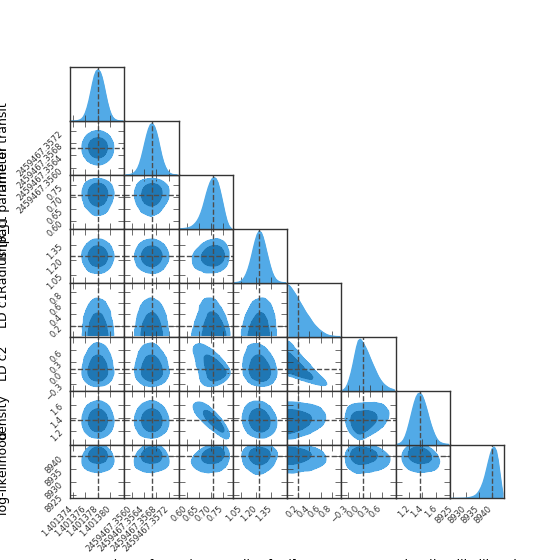

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


In [12]:
import pygtc
GTC = pygtc.plotGTC(chains=samples,
                    paramNames=labels,
                    truths=median,
                    plotName=filename + "_pygtc.pdf")
GTC = None